Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2017/2018  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 30. listopada 2017.*

(c) 2015-2017 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. listopada 2017.**  
Rok za predaju: **6. studenog 2017. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import mlutils
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.preprocessing import PolynomialFeatures
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
print (seven_X)
print ('----------------------------')
print (seven_y.transpose())
kopija_y = seven_y.reshape(7,1)
print (kopija_y)
print (len(seven_X[0]))

[[2 1]
 [2 3]
 [1 2]
 [3 2]
 [5 2]
 [5 4]
 [6 3]]
----------------------------
[1 1 1 1 0 0 0]
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]
2


Tocnost klasifikacije regresijom je 1.0


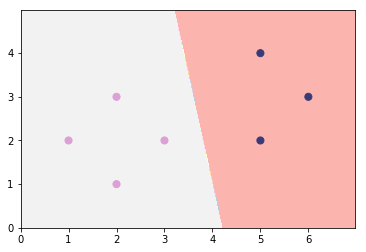

In [4]:
# Vaš kôd ovdje...
#phiX = PolynomialFeatures(1).fit_transform(seven_X)
#print (phiX) isti k je, očito radi automatski dodavanje jedinica ko u R-u, zanemari
model1a = RidgeClassifier(alpha=0).fit(seven_X,seven_y)
h1a = model1a.predict(seven_X)
print("Tocnost klasifikacije regresijom je " + str(accuracy_score(seven_y,h1a)))
mlutils.plot_2d_clf_problem(seven_X,seven_y,model1a.predict) # o majku ti poljubim 
#plt.plot(seven_X,seven_y, color='blue')
#plt.plot(seven_X,h1a, color='red')
#plt.show()

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

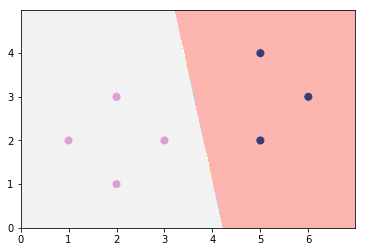

In [5]:
# Vaš kôd ovdje...
linear1a = LinearRegression().fit(seven_X,seven_y)
mlutils.plot_2d_clf_problem(seven_X,seven_y,lambda x : linear1a.predict(x) >= 0.5) #isto je 


**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

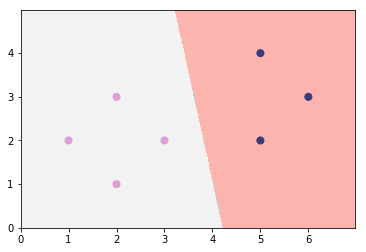

In [6]:
seven_y2 = np.array([1, 1, 1, 1, -1, -1, -1])

linear1a = LinearRegression().fit(seven_X,seven_y2)
mlutils.plot_2d_clf_problem(seven_X,seven_y2,lambda x : linear1a.predict(x) >= 0) # isto opet

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)
print(outlier_X)

[[ 2  1]
 [ 2  3]
 [ 1  2]
 [ 3  2]
 [ 5  2]
 [ 5  4]
 [ 6  3]
 [12  8]]


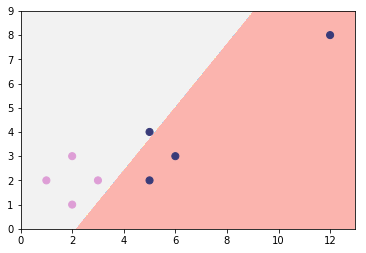

In [8]:
# 
linear1b = LinearRegression().fit(outlier_X,outlier_y)
mlutils.plot_2d_clf_problem(outlier_X,outlier_y,lambda x : linear1b.predict(x) >= 0.5)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

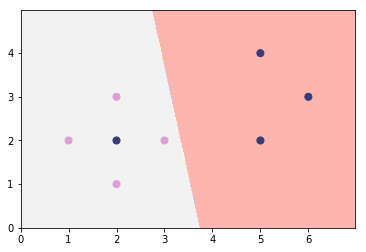

In [10]:

linear1c = LinearRegression().fit(unsep_X,unsep_y)
mlutils.plot_2d_clf_problem(unsep_X,unsep_y,lambda x : linear1c.predict(x) >= 0.5)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

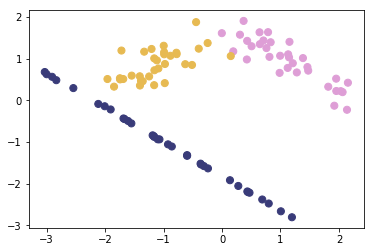

In [11]:
from sklearn.datasets import make_classification
x_2,y_2 = make_classification(n_features=2,n_redundant=0,n_classes=3,n_clusters_per_class=1)
mlutils.plot_2d_clf_problem(x_2,y_2)
# Vaš kôd ovdje...

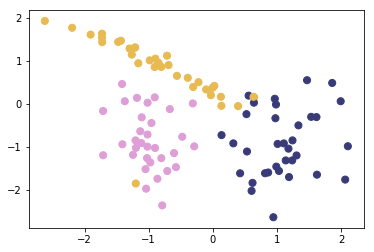

In [12]:
x2,y2 = make_classification(n_samples=100,n_features=2,n_redundant=0,n_classes=3,n_clusters_per_class=1)

mlutils.plot_2d_clf_problem(x2,y2)


Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

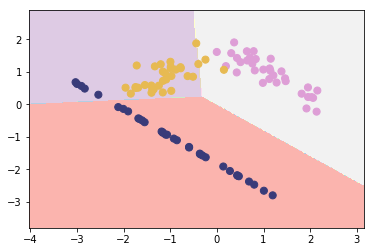

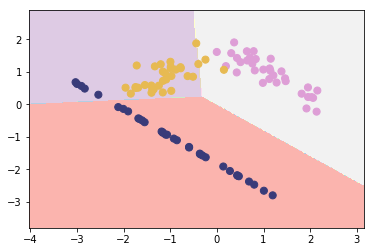

In [13]:
def labelModifier(trueY,label): # klasa koja se trenutačno gleda je ispravna ostale su krive
    classifiedY=[]
    for y in trueY:
        classifiedY.append(1) if y==label  else classifiedY.append(0)
    return classifiedY   

def buildClassifiers(x,y):
    classifiers=[]
    for i in range(0,3):
        #print ('prolaaaz')
        clY=labelModifier(y,i) # da
        classifier = LinearRegression().fit(x,clY)
        #mlutils.plot_2d_clf_problem(x,y,lambda x: classifier.predict(x) >= 0.5)
        #plt.show()
        classifiers.append(classifier)
        
    return classifiers

def mypredictions(x):
    classPredictions=[]
    for i in range(0,3):
        classPredictions.append(classifiers[i].predict(x))
    predictions=[]
    for j in range(len(x)):
        maxH = classPredictions[0][j]
        label = 0
        for i in range(1,3):
            newH = classPredictions[i][j]
            if (newH>maxH):
                maxH = newH
                label = i
        predictions.append(label)                
    return np.array(predictions)         

classifiers=buildClassifiers(x_2,y_2)
preds=mypredictions(x_2)
#len(preds)
#len(y_2)
#print(y_2)
#print(preds)
#mlutils.plot_2d_clf_problem(x_2,y_2,mypredictions)
#print(y_2)
#print (labelModifier(y_2,0)) radi valjda
mlutils.plot_2d_clf_problem(x_2,y_2,mypredictions)
plt.show()
ridge2 = RidgeClassifier(alpha=0).fit(x_2,y_2)
mlutils.plot_2d_clf_problem(x_2,y_2,ridge2.predict)
plt.show()
# radi 

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

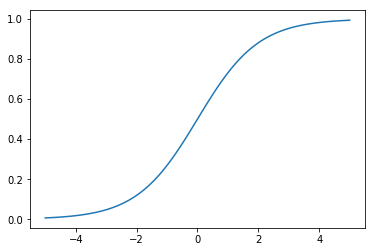

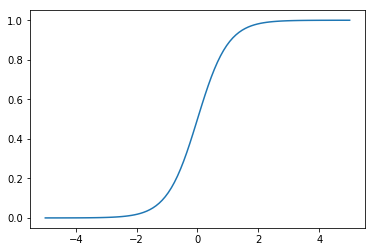

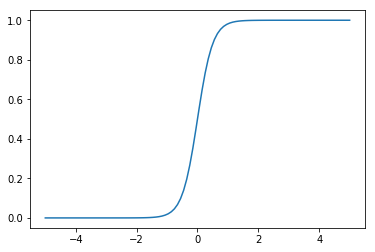

In [14]:
# Vaš kôd ovdje...
def sigmoida(x,alpha=1):
    #print('-------'+str(x))
    return (1.0 / (1+e**(-alpha*x)))
x3a = linspace(-5,5,100)

for alfica in [1,2,4]:
    y3a = []
    for t in x3a:
        y3a.append(sigmoida(t,alfica))
    plt.plot(x3a,y3a)
    plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

In [15]:
len(seven_X)
w=np.array([1,2,4])
w[1:] = [3,5]
w[0] = w[0] + 6
w[0] +=1
w[1:] = w[1:]+1
w

array([8, 4, 6])

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [16]:
print(seven_X.shape[1])
print(len(seven_X[0]))
print(PolynomialFeatures(1).fit_transform(seven_X))

2
2
[[ 1.  2.  1.]
 [ 1.  2.  3.]
 [ 1.  1.  2.]
 [ 1.  3.  2.]
 [ 1.  5.  2.]
 [ 1.  5.  4.]
 [ 1.  6.  3.]]


In [17]:
# Vaš kôd ovdje...
def lr_h1(x,w):
    pred = sigmoida(np.dot(x,w))
    return pred
def cross_entropy_error(X,y,w):
    error = 0
    for id,x in enumerate(X):
        h = lr_h(x,w)
        error += lr_gubitak(y[id],h)
    return error / len(X)
def cross_entropy_errorPlot(X,y,w): # jel moguce da sve sto koristi lr moram duplat zbog plota
    error = 0
    for id,x in enumerate(X):
        h = lr_zaPlot(x,w)
        error += lr_gubitak(y[id],h)
    return error / len(X)
def lr_gubitak(y,h):
    return -y*log(h)-(1-y)*log(1-h)
def lr_h(x,w):
    pred = sigmoida(np.dot(x,w))
    #pred = 1 if pred >=0.5 else 0 # 1,0
    return pred     
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    X = PolynomialFeatures(1).fit_transform(X)
    numWeigths = len(X[0]) # broj prediktora
    w = np.ndarray((1,numWeigths))
    
    w.fill(0)
    w=np.array(w[0])
    reg = 0.5*alpha*np.dot(w,w.transpose())
    traceW = []
    prev_error = cross_entropy_error(X, y, w)*len(X)
    for i in range(max_iter):
        dw = np.ndarray((1,numWeigths))
        dw.fill(0)
        dw = np.array(dw[0])
        for id,x in enumerate(X):
            h = lr_h(x,w)
            dw[0] = dw[0] + (h-y[id])
            dw[1:] = dw[1:] + (h-y[id])*x[1:]
            #dw += gradientMoj(h,y[id],x)
        #w = w -eta*dw
        w[0] = w[0] -eta*dw[0]
        w[1:] = w[1:]*(1-eta*alpha) - (eta*(dw[1:]))
        a = 6
        traceW.append(np.array(w))
        reg = np.dot(w,w.transpose())*0.5*alpha
        curr_error = cross_entropy_error(X, y, w)*len(X)
        if abs(prev_error-curr_error) < epsilon:
            print('IMAAAM TE '+ str(i) + ' ' + str(alpha) )
            break
        prev_error = curr_error
    if trace:
        return traceW
    else:
        return w
    
def gradientMoj(h,y,x):
    return (h-y)*x

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

[ 6.44150959 -2.11012128  0.53522851]
0.0775171825249


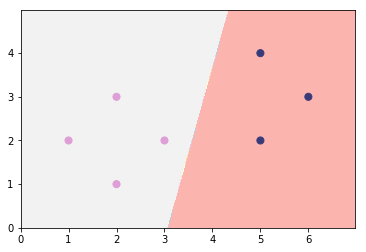

In [18]:
# Vaš kôd ovdje.
w = lr_train(seven_X,seven_y)
print(w)

def lr_zaPlot(x,w): # pitaj boga zasto
    return sigmoida(np.dot(x, w[1:]) + w[0]) # mislim da je zato jer plot funkcija izbjegava dummy znacajke
mlutils.plot_2d_clf_problem(seven_X, seven_y, 
                            h=lambda x : np.array([1 if lr_zaPlot(x, w) >= 0.5 else 0])) # ne smijes polinomiat tu
print (cross_entropy_error(PolynomialFeatures(1).fit_transform(seven_X),seven_y,w))


**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

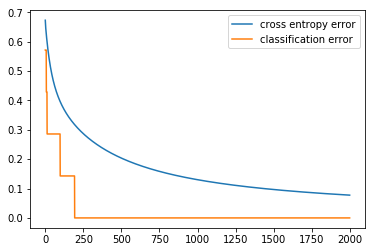

IMAAAM TE 1543 0
IMAAAM TE 1127 0


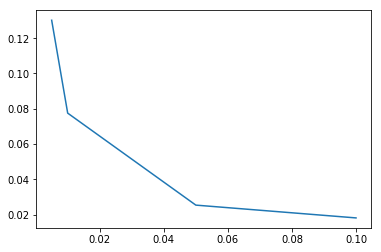

IMAAAM TE 1543 0
IMAAAM TE 1127 0


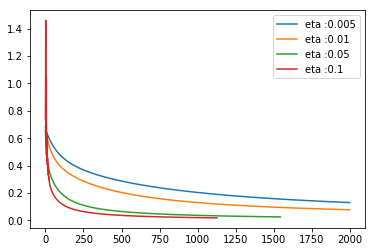

In [19]:

ws = lr_train(seven_X, seven_y, trace=True)

ce_error = list()
c_error = list()

for i in range(len(ws)):
    ce_error.append(cross_entropy_errorPlot(seven_X, seven_y, ws[i]))
    h = lr_zaPlot(seven_X, ws[i])
    c_error.append(1-accuracy_score(
        seven_y, [1 if h[j] >= 0.5 else 0 for j in range(len(h))]))
    
plt.plot(range(len(ws)), ce_error, label='cross entropy error')
plt.plot(range(len(ws)), c_error, label='classification error')
plt.legend();
plt.show()


ceError=list()
stope = [0.005,0.01,0.05,0.1]
for stopa in stope:
    wD = lr_train(seven_X,seven_y,eta=stopa)
    ceError.append(cross_entropy_errorPlot(seven_X,seven_y,wD))
plt.plot(stope,ceError)
plt.show()

for stopa in stope:
    ce_error = list()
    ws = lr_train(seven_X, seven_y, trace=True,eta=stopa)
    for i in range(len(ws)):
        ce_error.append(cross_entropy_errorPlot(seven_X, seven_y, ws[i]))
    
    plt.plot(range(len(ws)), ce_error, label='eta :' + str(stopa))
plt.legend()
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

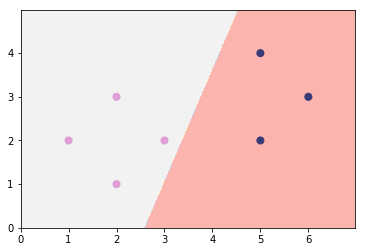

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
logit = LogisticRegression(max_iter=2000,C=10).fit(seven_X,seven_y) #inverz C odgovara learning rateu, pitaj asistenta 
predictions = logit.predict(seven_X)
mlutils.plot_2d_clf_problem(seven_X,seven_y,logit.predict)



### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

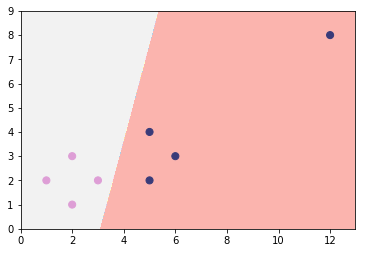

In [21]:
logit = LogisticRegression(max_iter=2000,C=10).fit(outlier_X,outlier_y) #inverz C odgovara learning rateu, pitaj asistenta 
predictions = logit.predict(outlier_X)
#mlutils.plot_2d_clf_problem(outlier_X,outlier_y,logit.predict)
#plt.show()
w4 = lr_train(outlier_X,outlier_y)
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, 
                            h=lambda x : np.array([1 if lr_zaPlot(x, w4) >= 0.5 else 0]))



#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


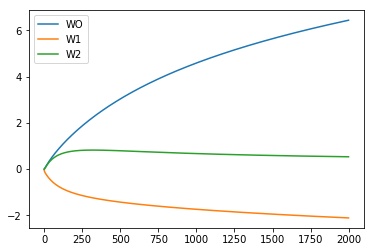

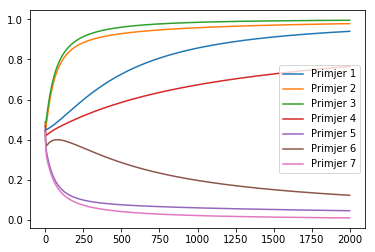

IMAAAM TE 1314 0


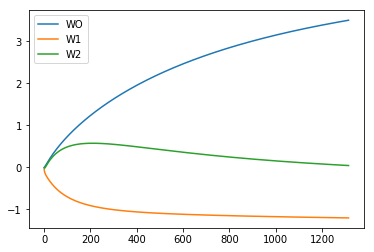

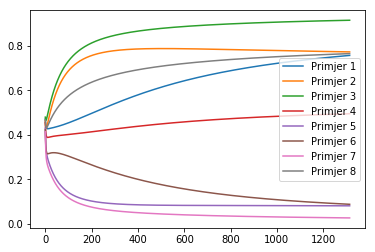

In [22]:
# Vaš kôd ovdje...
w4tr = lr_train(seven_X,seven_y,trace=True)
w14=[]
w24=[]
w34=[]

x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
x6=[]
x7=[]
for w4 in w4tr:
    w14.append(w4[0])
    w24.append(w4[1])
    w34.append(w4[2])
plt.plot(range(len(w4tr)),w14,label='WO')
plt.plot(range(len(w4tr)),w24,label='W1')
plt.plot(range(len(w4tr)),w34,label='W2')
plt.legend()
plt.show()

labels = ['1','2','3','4','5','6','7']
for x,l in zip(seven_X,labels):
    xH = []
    for w4 in w4tr:
        xH.append(lr_zaPlot(x,w4))
    plt.plot(range(len(w4tr)),xH,label='Primjer ' + str(l))
plt.legend()
plt.show()

w4tr = lr_train(unsep_X,unsep_y,trace=True)
w14=[]
w24=[]
w34=[]

x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
x6=[]
x7=[]
for w4 in w4tr:
    w14.append(w4[0])
    w24.append(w4[1])
    w34.append(w4[2])
plt.plot(range(len(w4tr)),w14,label='WO')
plt.plot(range(len(w4tr)),w24,label='W1')
plt.plot(range(len(w4tr)),w34,label='W2')
plt.legend()
plt.show()

labels = ['1','2','3','4','5','6','7','8']
for x,l in zip(unsep_X,labels):
    xH = []
    for w4 in w4tr:
        xH.append(lr_zaPlot(x,w4))
    plt.plot(range(len(w4tr)),xH,label='Primjer ' + str(l))
plt.legend()
plt.show()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

IMAAAM TE 1314 0


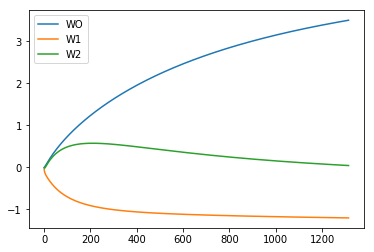

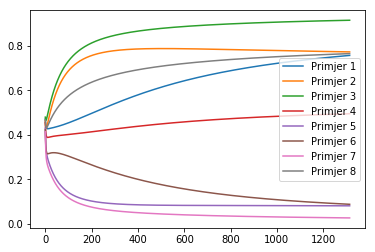

In [23]:
# Vaš kôd ovdje...
w4tr = lr_train(unsep_X,unsep_y,trace=True)
w14=[]
w24=[]
w34=[]

x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
x6=[]
x7=[]
for w4 in w4tr:
    w14.append(w4[0])
    w24.append(w4[1])
    w34.append(w4[2])
plt.plot(range(len(w4tr)),w14,label='WO')
plt.plot(range(len(w4tr)),w24,label='W1')
plt.plot(range(len(w4tr)),w34,label='W2')
plt.legend()
plt.show()

labels = ['1','2','3','4','5','6','7','8']
for x,l in zip(unsep_X,labels):
    xH = []
    for w4 in w4tr:
        xH.append(lr_zaPlot(x,w4))
    plt.plot(range(len(w4tr)),xH,label='Primjer ' + str(l))
plt.legend()
plt.show()

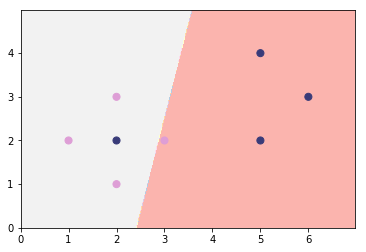

IMAAAM TE 1314 0


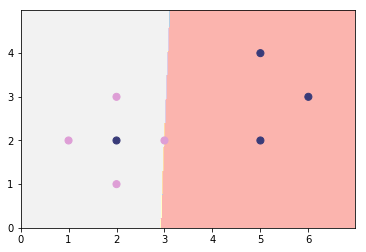

In [24]:
logit = LogisticRegression(max_iter=2000,C=10).fit(unsep_X,unsep_y) #inverz C odgovara learning rateu, pitaj asistenta 
mlutils.plot_2d_clf_problem(unsep_X,unsep_y,logit.predict)
plt.show()

w4 = lr_train(unsep_X,unsep_y)
mlutils.plot_2d_clf_problem(unsep_X,unsep_y, 
                          h=lambda x : np.array([1 if lr_zaPlot(x, w4) >= 0.5 else 0]))

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [25]:
from numpy.linalg import norm

In [26]:
# Vaš kôd ovdje...
def lr_train_reg(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    X = PolynomialFeatures(1).fit_transform(X)
    numWeigths = len(X[0]) # broj prediktora
    w = np.ndarray((1,numWeigths))
    
    w.fill(0)
    w=w[0]
    traceW = []
    prev_error = cross_entropy_error(X, y, w)*len(X) + 0.5*alpha*np.dot(w[1:],w[1:].transpose())
    for i in range(max_iter):
        dw = np.ndarray((1,numWeigths))
        dw.fill(0)
        dw = dw[0]
        dw0 = dw[0]
        dw = dw[1:]
        for id,x in enumerate(X):
            h = lr_h(x,w)
            dw0 = dw0 + (h-y[id])
            dw += gradientMoj(h,y[id],x[1:])
        w[0] = w[0] - eta*dw0
        w[1:] = w[1:]*(1-eta*alpha) - eta*dw
        traceW.append(w)
        curr_error = cross_entropy_error(X, y, w)*len(X)  + 0.5*alpha*np.dot(w[1:],w[1:].transpose())
        if abs(prev_error-curr_error) < epsilon:
            print('IMAAAM TE '+ str(i) + ' ' + str(alpha)) 
            break
        prev_error = curr_error
    if trace:
        return traceW
    else:
        return w
    


/home/marok/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


IMAAAM TE 771 10
IMAAAM TE 229 100


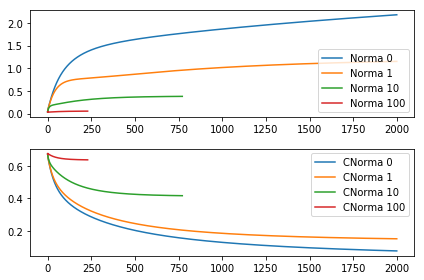

In [27]:
alphas = [0,1,10,100]
for al in alphas:
    normica = []
    ceErr = []
    wTrac = lr_train(seven_X,seven_y,trace=True,alpha=al)
    for i in range(len(wTrac)):
        ceErr.append(cross_entropy_errorPlot(seven_X,seven_y,wTrac[i]))
        normica.append(norm(wTrac[i][1:],ord=2))
    plt.subplot(2,1,1)
    plt.plot(range(len(wTrac)),normica,label = 'Norma ' + str(al))
    plt.legend()
    plt.subplot(2,1,2)
    plt.plot(range(len(wTrac)),ceErr,label = 'CNorma ' + str(al))
    plt.legend()
plt.tight_layout()

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

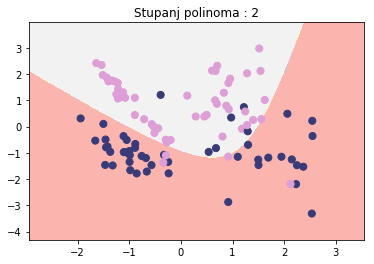

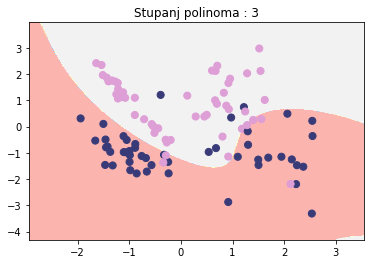

In [40]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

d = [2,3]
#x6,y6 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
for pol in d:
    poly = PolynomialFeatures(pol)
    phiX6 = poly.fit_transform(x6)
    model = LogisticRegression(max_iter=2000,C=30).fit(phiX6,y6)
    mlutils.plot_2d_clf_problem(x6,y6,lambda x : model.predict(poly.transform(x)))
    plt.title('Stupanj polinoma : ' + str(pol))
    plt.show()                                

In [29]:
# Vaš kôd ovdje...

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?